In [56]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [6]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [13]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [11]:
for column_name in useducation_df.columns:
    print("Unique values in column {} are: {}".format(column_name, useducation_df[column_name].unique()))

Unique values in column PRIMARY_KEY are: ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2017_WEST_VIRGINIA'
 '2017_WISCONSIN' '2017_WYOMING']
Unique values in column STATE are: ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DOD_OVERSEAS' 'DOD_DOMESTIC' 'AMERICAN_SAMOA'
 'GUAM' 'NORTHERN_MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'BI' 'DD'
 'NORTHERN_MARIANA_ISLANDS' 'DEPARTMENT_OF_DEFENSE'
 'BUREAU_OF_INDIAN_E

In [17]:
len(useducation_df.ENROLL.unique())

1225

PRIMARY_KEY                     Nominal Categorical Variable / Continuous Interval Variable 

STATE                           Nominal Categorical Variable / Continuous Interval Variable 

YEAR                            Ordinal Categorical Variable / Continuous Ratio Variable

ENROLL                          Continuous Interval Variable

TOTAL_REVENUE                   Continuous Ratio Variable

FEDERAL_REVENUE                 Continuous Ratio Variable

STATE_REVENUE                   Continuous Ratio Variable

LOCAL_REVENUE                   Continuous Ratio Variable

TOTAL_EXPENDITURE               Continuous Ratio Variable

INSTRUCTION_EXPENDITURE         Continuous Ratio Variable

SUPPORT_SERVICES_EXPENDITURE    Continuous Ratio Variable

OTHER_EXPENDITURE               Continuous Ratio Variable

CAPITAL_OUTLAY_EXPENDITURE      Continuous Ratio Variable

GRADES_PK_G                     Continuous Ratio Variable

GRADES_KG_G                     Continuous Ratio Variable

GRADES_4_G                      Continuous Ratio Variable

GRADES_8_G                      Continuous Ratio Variable

GRADES_12_G                     Continuous Ratio Variable

GRADES_1_8_G                    Continuous Ratio Variable

GRADES_9_12_G                   Continuous Ratio Variable

GRADES_ALL_G                    Continuous Ratio Variable

AVG_MATH_4_SCORE                Continuous Ratio Variable

AVG_MATH_8_SCORE                Continuous Ratio Variable

AVG_READING_4_SCORE             Continuous Ratio Variable

AVG_READING_8_SCORE             Continuous Ratio Variable

In [10]:
useducation_df.isnull().sum()*100/useducation_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [45]:
useducation2_df = useducation_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
             "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

for col in fill_list:
    useducation2_df.loc[:, col].fillna(useducation2_df.loc[:, col].mean(), inplace=True)

In [37]:
useducation3_df = useducation_df.copy()

years = useducation3_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        useducation3_df.loc[useducation3_df["YEAR"] == year, col].fillna(
            useducation3_df.loc[useducation3_df["YEAR"] == year, col].mean(), inplace=True)

In [40]:
useducation4_df = useducation_df.copy()

for col in fill_list:
    useducation4_df.loc[:, col].interpolate(inplace=True)

In [46]:
useducation2_df.isnull().sum()*100/useducation2_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

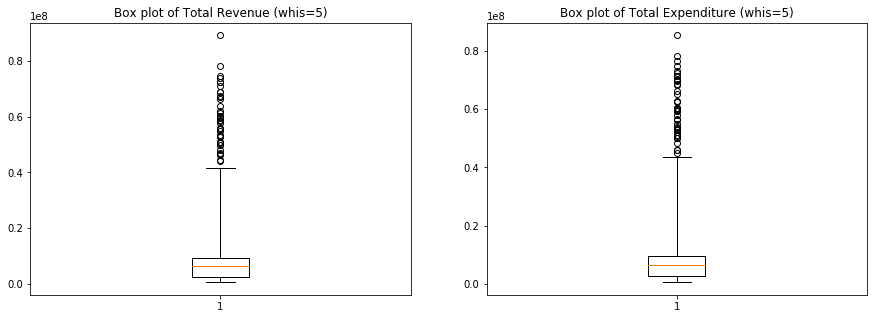

In [76]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation2_df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of Total Revenue (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(useducation2_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of Total Expenditure (whis=5)")
plt.show()

In [53]:
q75, q25 = np.percentile(useducation2_df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((useducation2_df["TOTAL_REVENUE"] > max_val) 
                      | (useducation2_df["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 121
The score threshold is: 2.5
Number of outliers is: 93
The score threshold is: 3.0
Number of outliers is: 66
The score threshold is: 3.5
Number of outliers is: 51
The score threshold is: 4.0
Number of outliers is: 45
The score threshold is: 4.5
Number of outliers is: 42


In [54]:
q75, q25 = np.percentile(useducation2_df["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((useducation2_df["TOTAL_EXPENDITURE"] > max_val) 
                      | (useducation2_df["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 190
The score threshold is: 1.5
Number of outliers is: 148
The score threshold is: 2.0
Number of outliers is: 113
The score threshold is: 2.5
Number of outliers is: 91
The score threshold is: 3.0
Number of outliers is: 61
The score threshold is: 3.5
Number of outliers is: 52
The score threshold is: 4.0
Number of outliers is: 49
The score threshold is: 4.5
Number of outliers is: 43


In [79]:
useducation2_df["total_revenue_clean"] = winsorize(useducation2_df["TOTAL_REVENUE"], (0, 0.1))
useducation2_df["total_expenditure_clean"] = winsorize(useducation2_df["TOTAL_EXPENDITURE"], (0, 0.1))

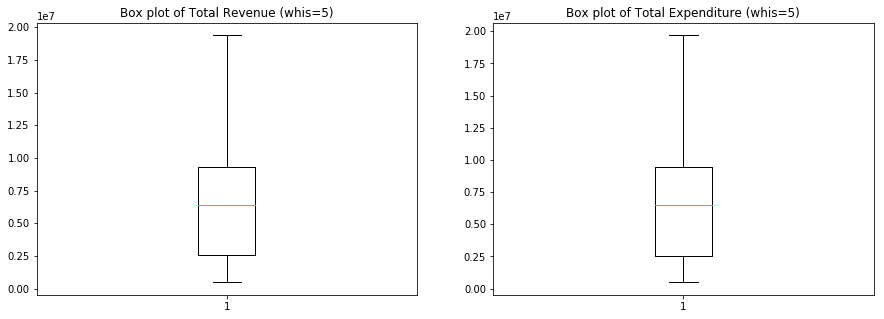

In [80]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation2_df["total_revenue_clean"], whis = 5)
plt.title("Box plot of Total Revenue (whis=5)")

plt.subplot(1,2,2)
plt.boxplot(useducation2_df["total_expenditure_clean"], whis = 5)
plt.title("Box plot of Total Expenditure (whis=5)")
plt.show()

In [91]:
useducation2_df["budget_deflicit"]= useducation2_df["TOTAL_REVENUE"] - useducation2_df["TOTAL_EXPENDITURE"]

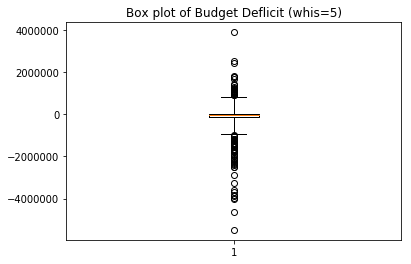

In [92]:
plt.boxplot(useducation2_df["budget_deflicit"], whis = 5)
plt.title("Box plot of Budget Deflicit (whis=5)")
plt.show()

In [93]:
useducation2_df["budget_deflicit_clean"] = winsorize(useducation2_df["budget_deflicit"], (0.1, 0.1))

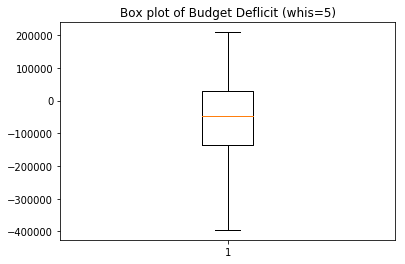

In [94]:
plt.boxplot(useducation2_df["budget_deflicit_clean"], whis = 5)
plt.title("Box plot of Budget Deflicit (whis=5)")
plt.show()

In [95]:
useducation2_df["budget_deflicit2"]= useducation2_df["total_revenue_clean"] - useducation2_df["total_expenditure_clean"]

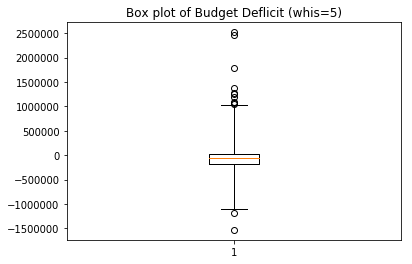

In [96]:
plt.boxplot(useducation2_df["budget_deflicit2"], whis = 5)
plt.title("Box plot of Budget Deflicit (whis=5)")
plt.show()

In [97]:
useducation2_df["budget_deflicit2_clean"] = winsorize(useducation2_df["budget_deflicit2"], (0.1, 0.1))

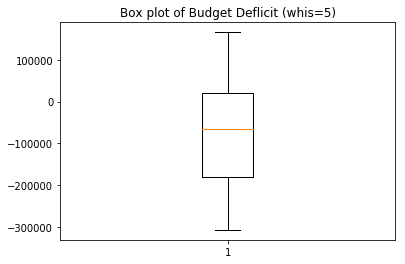

In [98]:
plt.boxplot(useducation2_df["budget_deflicit2_clean"], whis = 5)
plt.title("Box plot of Budget Deflicit (whis=5)")
plt.show()

In [121]:
useducation2_df.iloc[:, 27:31].describe()

,budget deflicit,budget_deflicit,budget_deflicit_clean,budget_deflicit2
count,1.492000e+03,1.492000e+03,1492.000000,1.492000e+03
mean,-1.045990e+05,-1.045990e+05,-66300.347958,-6.468178e+04
std,5.310770e+05,5.310770e+05,172254.236587,2.682253e+05
min,-5.487742e+06,-5.487742e+06,-395270.000000,-1.531644e+06
25%,-1.360070e+05,-1.360070e+05,-136007.000000,-1.811838e+05
50%,-4.849350e+04,-4.849350e+04,-48493.500000,-6.565100e+04
75%,2.965425e+04,2.965425e+04,29654.250000,2.047350e+04
max,3.897129e+06,3.897129e+06,208528.000000,2.520706e+06


In [128]:
useducation2_df.loc[:, "budget_deflicit":"budget_deflicit2_clean"].describe()

,budget_deflicit,budget_deflicit_clean,budget_deflicit2,budget_deflicit2_clean
count,1.492000e+03,1492.000000,1.492000e+03,1492.000000
mean,-1.045990e+05,-66300.347958,-6.468178e+04,-74987.851979
std,5.310770e+05,172254.236587,2.682253e+05,149006.815983
min,-5.487742e+06,-395270.000000,-1.531644e+06,-306344.000000
25%,-1.360070e+05,-136007.000000,-1.811838e+05,-181183.750000
50%,-4.849350e+04,-48493.500000,-6.565100e+04,-65651.000000
75%,2.965425e+04,29654.250000,2.047350e+04,20473.500000
max,3.897129e+06,208528.000000,2.520706e+06,165510.000000


Since budegt dfeicincy is the variable of interest. I would prefer to use the method in question 3. I would deal with the outliers for Total Revenue and Totall Expediture frist, then I create the new varibale of interest, then check if there are outliers and deal with them.